# Project 2  
CS301  
Haley Patel, Jose Ventura, Kareem Saad, Arya Mazandarani

Dataset Source: https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset?select=HR_Analytics.csv

## Dataset Description


---

This dataset is about HR analytics, also referred to as people analytics, workforce analytics, or talent analytics, involves gathering together, analyzing, and reporting HR data. It is the collection and application of talent data to improve critical talent and business outcomes.


The purpose of this project is to predict an employee's monthly income based on different variables such as age, department, years at company, job level, and total working years.


### Features

---



In [ ]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

url = 'https://drive.google.com/file/d/1qdqJGbSBEr20XMhYcu-JFzN9nwiqi6Pk/view?usp=sharing' #HR
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
# Dataset Description
print(df.head())

print('\nNumber of rows:', df.shape[0])
print('Number of columns:', df.shape[1],'\n')


# Print the number of missing values in each column
print(df.isnull().sum())

# Get the statistical summary of the dataset
print(df.describe())

print(df.head())

df.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

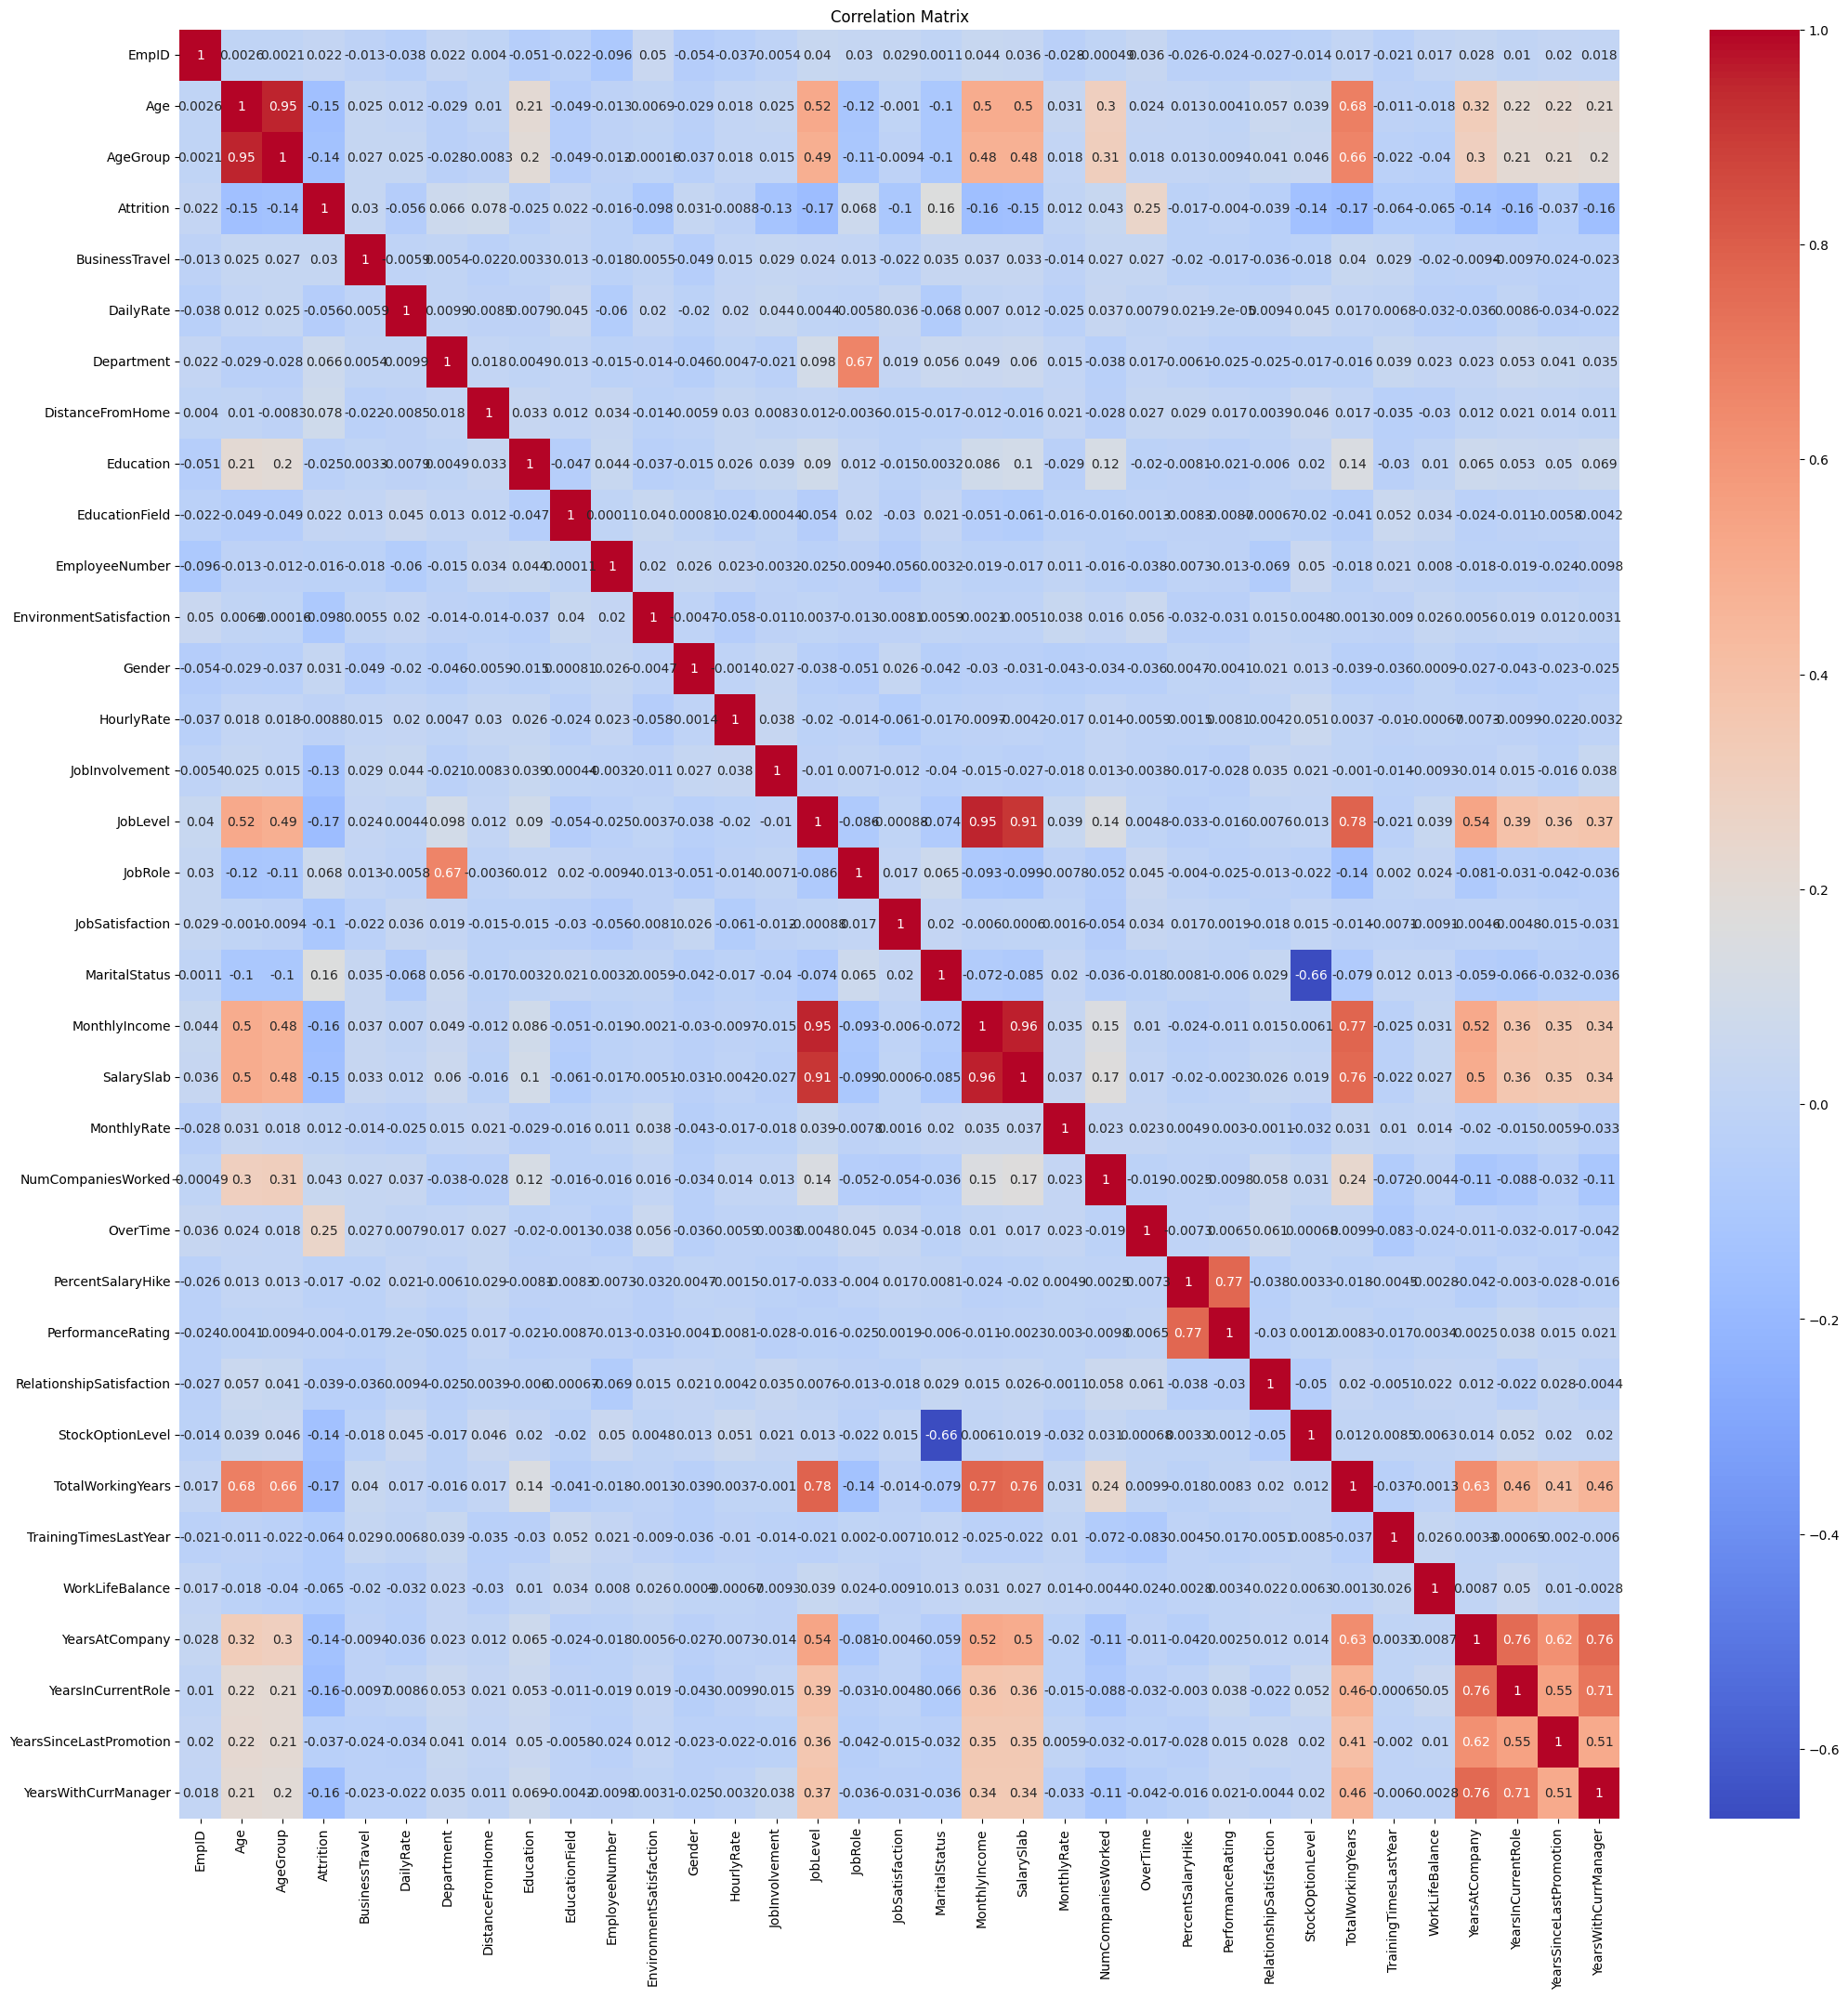

In [ ]:
label_encoding = LabelEncoder()

str_col = df.select_dtypes(include=('object')).columns

df['SalarySlab'] = df['SalarySlab'].apply(lambda x: 0 if x=='Up to 5k' else 1 if x=='5k-10k' else 2 if x=='10k-15k' else 3 if x=='15k+' else -1)

df.dropna(axis=0,how='any',inplace=True)
for col in str_col:
    df[col] = label_encoding.fit_transform(df[col].astype('str'))



plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

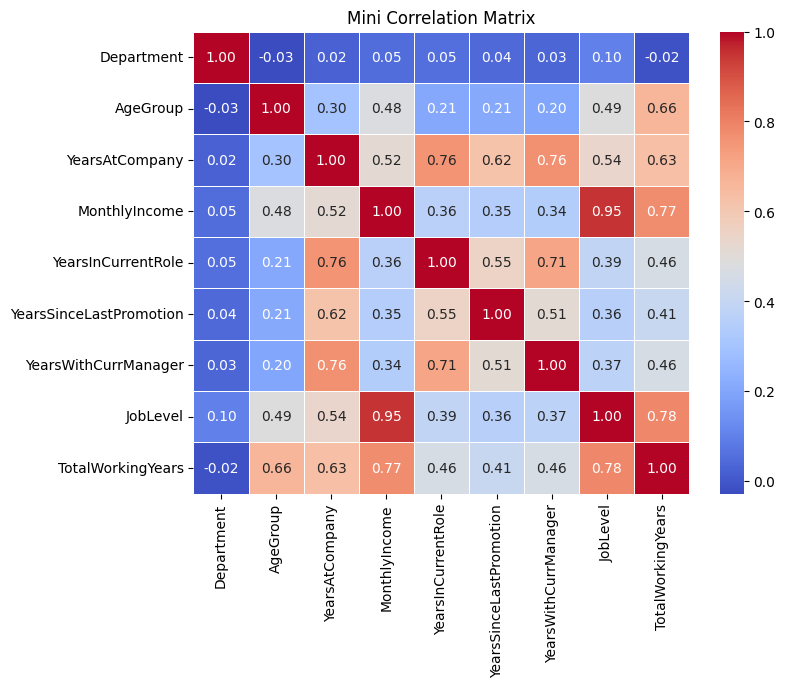

In [ ]:
col_of_interest = ['Department', 'AgeGroup', 'YearsAtCompany', 'MonthlyIncome', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'JobLevel', 'TotalWorkingYears']
selected_df = df[col_of_interest]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mini Correlation Matrix")
plt.show()

# Data Visualizations

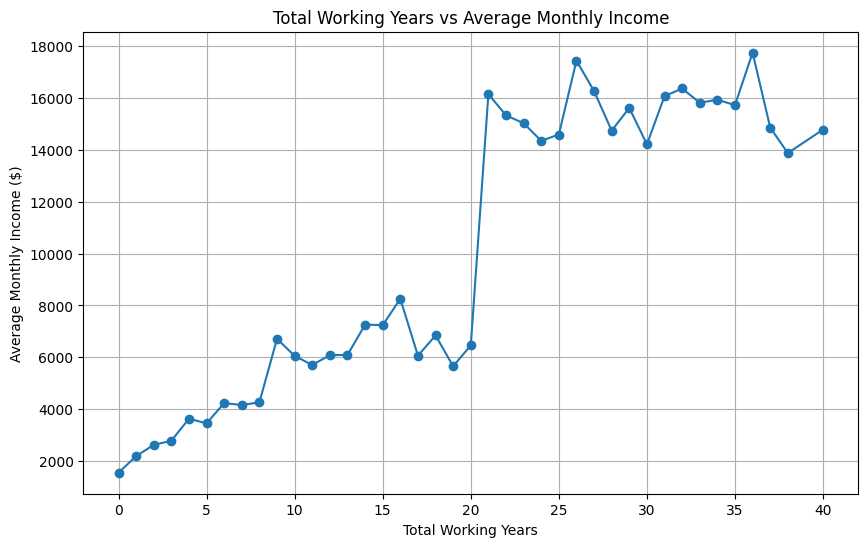

In [ ]:
average_income = df.groupby('TotalWorkingYears')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_income['TotalWorkingYears'], average_income['MonthlyIncome'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Total Working Years')
plt.ylabel('Average Monthly Income ($)')
plt.title('Total Working Years vs Average Monthly Income')

# Display the plot
plt.grid(True)
plt.show()

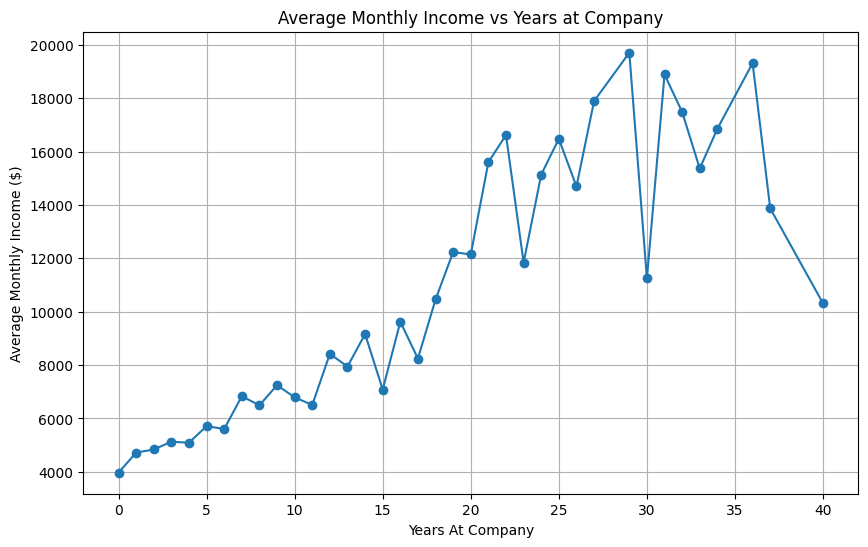

In [ ]:
average_income = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_income['YearsAtCompany'], average_income['MonthlyIncome'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income ($)')
plt.title('Average Monthly Income vs Years at Company')

# Display the plot
plt.grid(True)
plt.show()

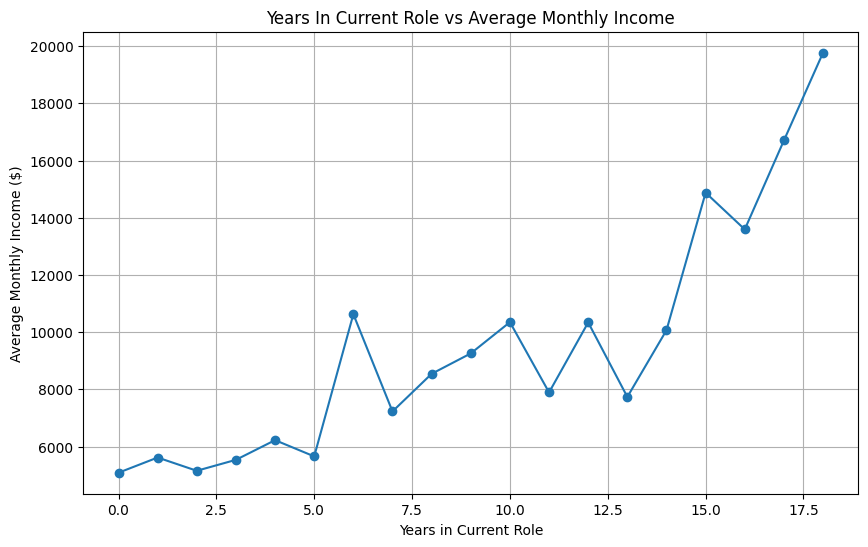

In [ ]:
average_income = df.groupby('YearsInCurrentRole')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_income['YearsInCurrentRole'], average_income['MonthlyIncome'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Years in Current Role')
plt.ylabel('Average Monthly Income ($)')
plt.title('Years In Current Role vs Average Monthly Income')

# Display the plot
plt.grid(True)
plt.show()

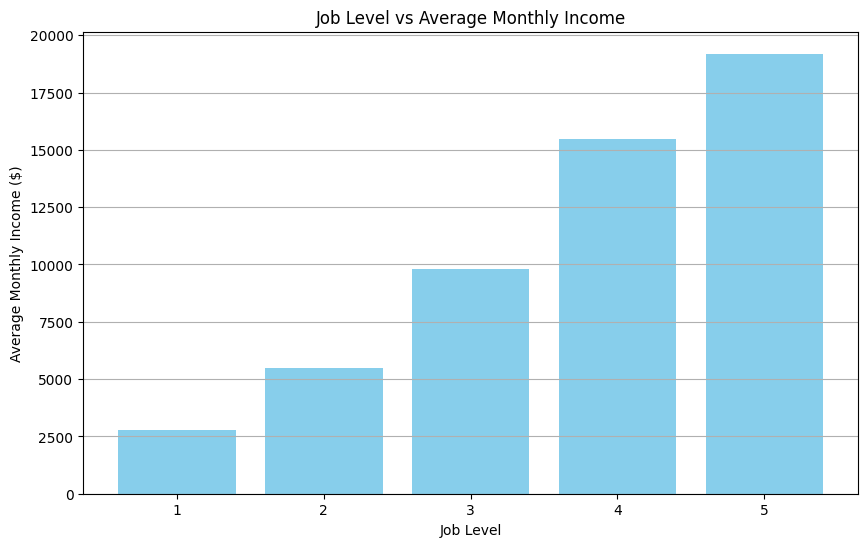

In [ ]:
average_income = df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_income['JobLevel'], average_income['MonthlyIncome'], color='skyblue')

plt.xlabel('Job Level')
plt.ylabel('Average Monthly Income ($)')
plt.title('Job Level vs Average Monthly Income')

plt.grid(axis='y')
plt.show()

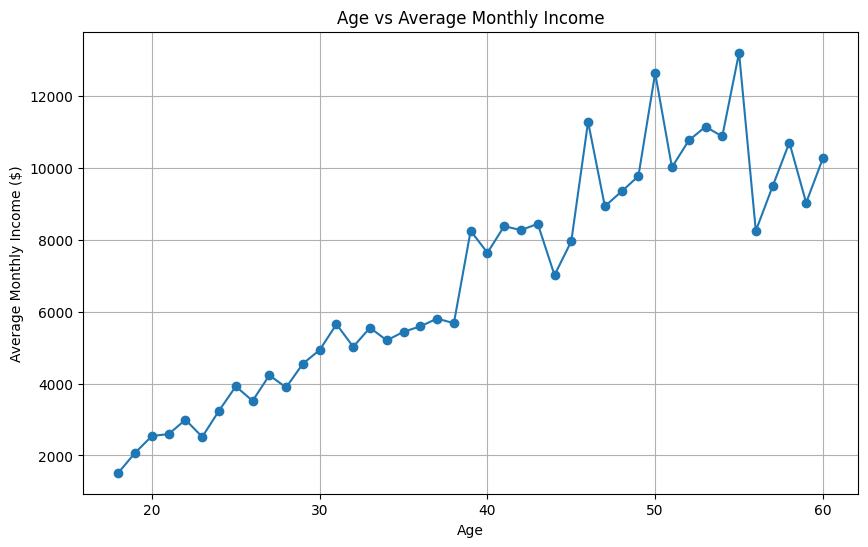

In [ ]:
average_income = df.groupby('Age')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_income['Age'], average_income['MonthlyIncome'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Average Monthly Income ($)')
plt.title('Age vs Average Monthly Income')

# Display the plot
plt.grid(True)
plt.show()

# Part 2: Train Models - Linear Regression

In [ ]:
#Linear Regression
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Data preprocessing
encoder = LabelEncoder()
df['Department'] = encoder.fit_transform(df['Department']) # 0: HR, 1: Research & Development, 2: Sales

X = df[['AgeGroup', 'Department', 'YearsAtCompany', 'JobLevel', 'TotalWorkingYears']]
y = df['MonthlyIncome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Part 3: Test and Evaluate - Linear Regression

Mean Absolute Error: 1024.9784068166875
R2 Score: 0.9141699487324936
      Actual Monthly Income  Predicted Monthly Income
1236                  13225              14122.855941
704                    4249               6194.811904
1128                   5675               5697.078528
1046                   2289               2097.452150
984                    4327               5706.564595
...                     ...                       ...
1408                   6854               6335.051089
1163                   2436               2176.426376
951                   19431              18368.307822
923                    6389               6609.906740
1155                  10209              10479.104581

[285 rows x 2 columns]


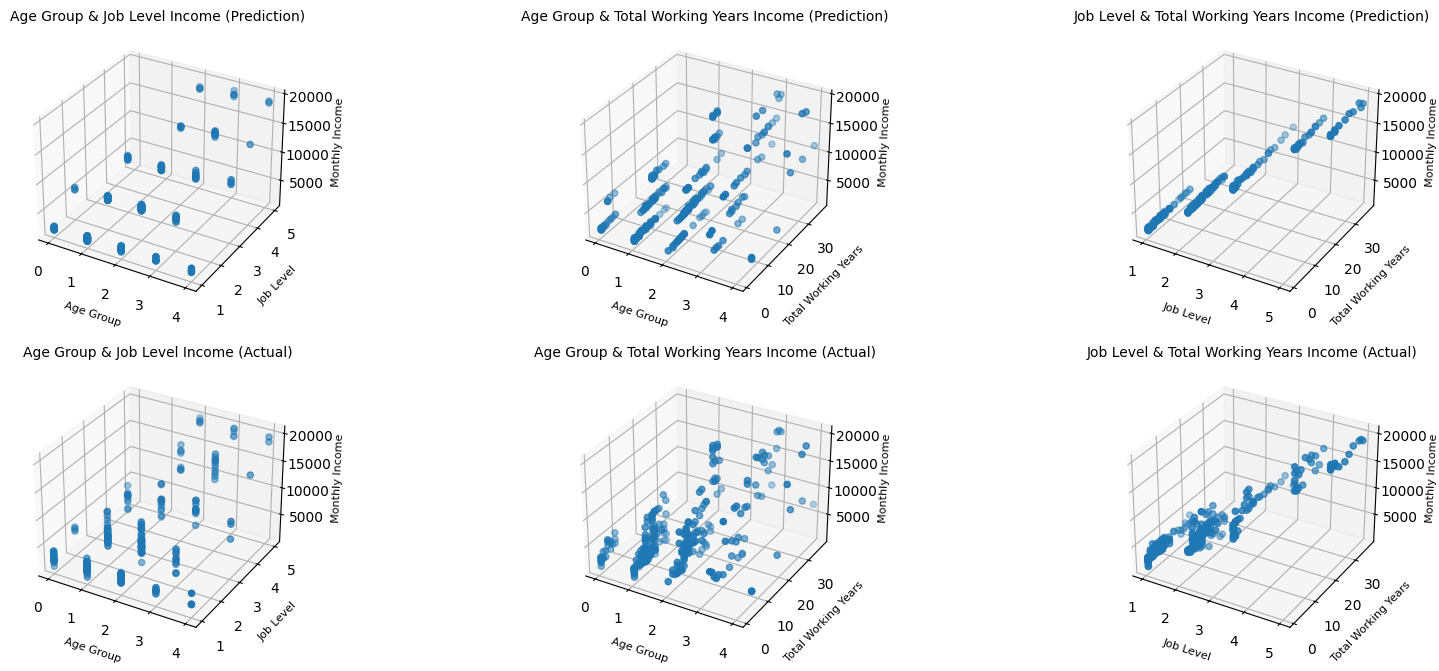

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

results_df = pd.DataFrame({'Actual Monthly Income': y_test, 'Predicted Monthly Income': y_pred})
print(results_df)

fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')

ax1.scatter(X_test['AgeGroup'], X_test['JobLevel'], y_pred)
ax1.set_title('Age Group & Job Level Income (Prediction)', fontsize=10)
ax1.set_xlabel('Age Group', fontsize=8)
ax1.set_ylabel('Job Level', fontsize=8)
ax1.set_zlabel('Monthly Income', fontsize=8)

ax2.scatter(X_test['AgeGroup'], X_test['TotalWorkingYears'], y_pred)
ax2.set_title('Age Group & Total Working Years Income (Prediction)', fontsize=10)
ax2.set_xlabel('Age Group', fontsize=8)
ax2.set_ylabel('Total Working Years', fontsize=8)
ax2.set_zlabel('Monthly Income', fontsize=8)

ax3.scatter(X_test['JobLevel'], X_test['TotalWorkingYears'], y_pred)
ax3.set_title('Job Level & Total Working Years Income (Prediction)', fontsize=10)
ax3.set_xlabel('Job Level', fontsize=8)
ax3.set_ylabel('Total Working Years', fontsize=8)
ax3.set_zlabel('Monthly Income', fontsize=8)

ax4.scatter(X_test['AgeGroup'], X_test['JobLevel'], y_test)
ax4.set_title('Age Group & Job Level Income (Actual)', fontsize=10)
ax4.set_xlabel('Age Group', fontsize=8)
ax4.set_ylabel('Job Level', fontsize=8)
ax4.set_zlabel('Monthly Income', fontsize=8)

ax5.scatter(X_test['AgeGroup'], X_test['TotalWorkingYears'], y_test)
ax5.set_title('Age Group & Total Working Years Income (Actual)', fontsize=10)
ax5.set_xlabel('Age Group', fontsize=8)
ax5.set_ylabel('Total Working Years', fontsize=8)
ax5.set_zlabel('Monthly Income', fontsize=8)

ax6.scatter(X_test['JobLevel'], X_test['TotalWorkingYears'], y_test)
ax6.set_title('Job Level & Total Working Years Income (Actual)', fontsize=10)
ax6.set_xlabel('Job Level', fontsize=8)
ax6.set_ylabel('Total Working Years', fontsize=8)
ax6.set_zlabel('Monthly Income', fontsize=8)

plt.show()
#ax.plot(x_pred, y_pred, color='k', label='Regression model')

# Part 2: Train Models - Random Forest Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Data preprocessing
encoder = LabelEncoder()
df['Department'] = encoder.fit_transform(df['Department']) # 0: HR, 1: Research & Development, 2: Sales

col_of_interest = ['AgeGroup', 'Department', 'YearsAtCompany', 'JobLevel', 'TotalWorkingYears']
features = df[col_of_interest]
target = df['MonthlyIncome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Task 3: Test and Evaluate - Random Forest Regression

Mean Absolute Error: 969.40239474133
R2 Score: 0.917073630968746


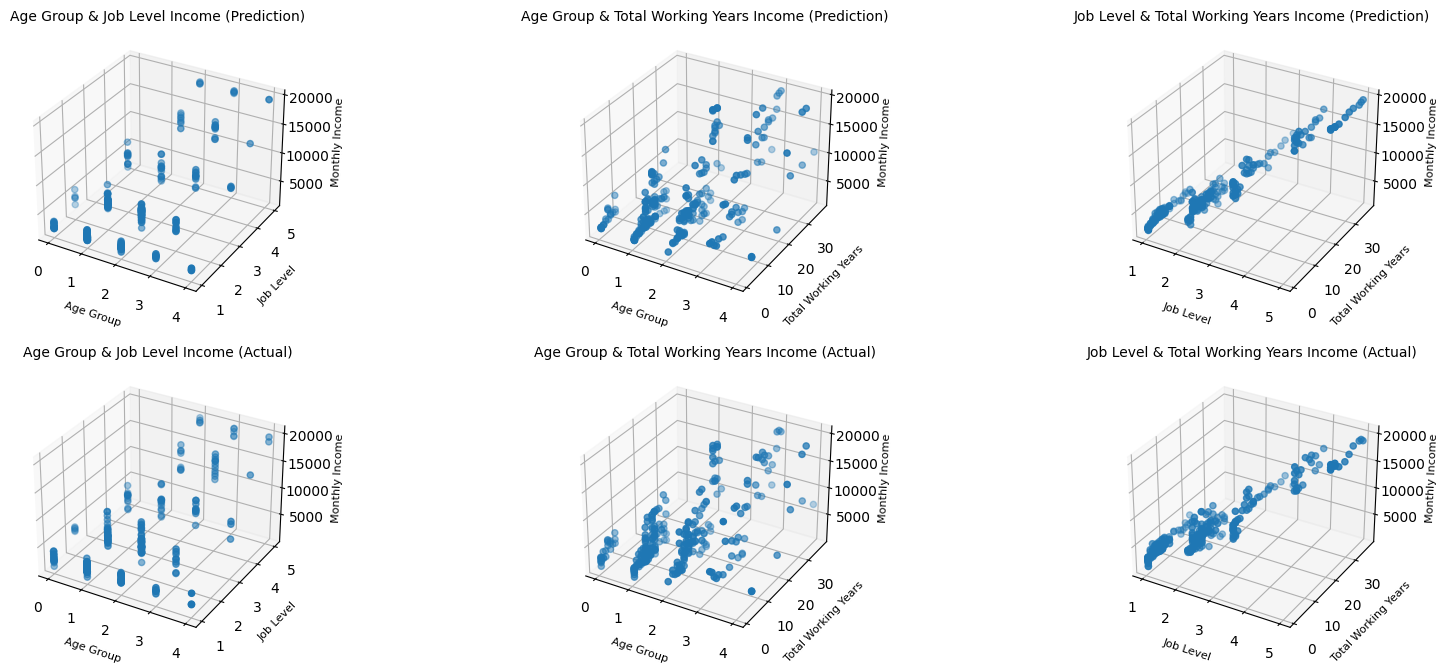

In [ ]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')

ax1.scatter(X_test['AgeGroup'], X_test['JobLevel'], y_pred)
ax1.set_title('Age Group & Job Level Income (Prediction)', fontsize=10)
ax1.set_xlabel('Age Group', fontsize=8)
ax1.set_ylabel('Job Level', fontsize=8)
ax1.set_zlabel('Monthly Income', fontsize=8)

ax2.scatter(X_test['AgeGroup'], X_test['TotalWorkingYears'], y_pred)
ax2.set_title('Age Group & Total Working Years Income (Prediction)', fontsize=10)
ax2.set_xlabel('Age Group', fontsize=8)
ax2.set_ylabel('Total Working Years', fontsize=8)
ax2.set_zlabel('Monthly Income', fontsize=8)

ax3.scatter(X_test['JobLevel'], X_test['TotalWorkingYears'], y_pred)
ax3.set_title('Job Level & Total Working Years Income (Prediction)', fontsize=10)
ax3.set_xlabel('Job Level', fontsize=8)
ax3.set_ylabel('Total Working Years', fontsize=8)
ax3.set_zlabel('Monthly Income', fontsize=8)

ax4.scatter(X_test['AgeGroup'], X_test['JobLevel'], y_test)
ax4.set_title('Age Group & Job Level Income (Actual)', fontsize=10)
ax4.set_xlabel('Age Group', fontsize=8)
ax4.set_ylabel('Job Level', fontsize=8)
ax4.set_zlabel('Monthly Income', fontsize=8)

ax5.scatter(X_test['AgeGroup'], X_test['TotalWorkingYears'], y_test)
ax5.set_title('Age Group & Total Working Years Income (Actual)', fontsize=10)
ax5.set_xlabel('Age Group', fontsize=8)
ax5.set_ylabel('Total Working Years', fontsize=8)
ax5.set_zlabel('Monthly Income', fontsize=8)

ax6.scatter(X_test['JobLevel'], X_test['TotalWorkingYears'], y_test)
ax6.set_title('Job Level & Total Working Years Income (Actual)', fontsize=10)
ax6.set_xlabel('Job Level', fontsize=8)
ax6.set_ylabel('Total Working Years', fontsize=8)
ax6.set_zlabel('Monthly Income', fontsize=8)

plt.show()

Extra : Predicting SalarySlab

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

col_of_interest = ['AgeGroup', 'JobLevel', 'TotalWorkingYears']
features = df[col_of_interest]
target = df['SalarySlab']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

#R2 Score
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print("Accuracy:", accuracy)


# Test Data Predictions

col_of_interest = ['AgeGroup', 'JobLevel', 'TotalWorkingYears', 'SalarySlab']
selected_df = df[col_of_interest]
X_test_actual = selected_df.sample(n=10, random_state=42)  # Adjust the sample size as needed
y_test_actual = X_test_actual['SalarySlab']
X_test_scaled_actual = scaler.transform(X_test_actual.drop('SalarySlab', axis=1))
predictions_actual = model.predict(X_test_scaled_actual)
result_df_logistic = pd.DataFrame({
    'Actual SalarySlab': y_test_actual.values,
    'Predicted SalarySlab': predictions_actual
})
print(result_df_logistic)



Mean Absolute Error: 0.17543859649122806
R2 Score: 0.808483186839771
Accuracy: 0.8245614035087719
   Actual SalarySlab  Predicted SalarySlab
0                  2                     3
1                  0                     1
2                  1                     1
3                  0                     0
4                  0                     1
5                  0                     0
6                  3                     3
7                  1                     1
8                  0                     0
9                  0                     0
